<a href="https://colab.research.google.com/github/jaybeberry9591/ereturn_analyzer/blob/main/nrb_mcs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from statsmodels.tsa.arima_process import ArmaProcess
warnings.filterwarnings('ignore')

In [ ]:
#Generate Synthetic Dataset

np.random.seed(42)
n_samples = 100

data = pd.DataFrame({
    "Taxable_Income": np.random.normal(50000, 15000, n_samples),  # Mean 50K, Std 15K
    "Deductions": np.random.normal(10000, 3000, n_samples),  # Mean 10K, Std 3K
    "Taxpayer_Type": np.random.choice(["Individual", "Corporate", "Small Business"], n_samples),
    "Sector": np.random.choice(["Garments", "Agriculture", "Manufacturing"], n_samples),
    "Compliance_Rate": np.random.uniform(40, 90, n_samples),  # Between 40% and 90%
    "GDP_Growth": np.random.uniform(2, 8, n_samples),
    "Inflation_Rate": np.random.uniform(1, 10, n_samples),
    "Unemployment_Rate": np.random.uniform(3, 12, n_samples),
    "Interest_Rates": np.random.uniform(2, 12, n_samples),
    "Exchange_Rates": np.random.uniform(80, 120, n_samples),
    "Tax_Revenue": np.random.normal(500000, 50000, n_samples),
    "Policy_Change": np.random.choice(["No Change", "New Deductions", "Corporate Tax Cut"], n_samples),
})

In [ ]:
data

,Taxable_Income,Deductions,Taxpayer_Type,Sector,Compliance_Rate,GDP_Growth,Inflation_Rate,Unemployment_Rate,Interest_Rates,Exchange_Rates,Tax_Revenue,Policy_Change
0,57450.712295,5753.887774,Corporate,Agriculture,58.886444,2.193896,4.105744,8.344948,8.513672,113.925124,534581.034048,Corporate Tax Cut
1,47926.035482,8738.064032,Corporate,Garments,66.716374,3.678581,4.128573,6.323074,9.712467,84.911076,564307.422755,New Deductions
2,59715.328072,8971.856450,Individual,Garments,64.828060,4.467240,1.286242,7.088412,5.744354,115.057763,540240.158937,Corporate Tax Cut
3,72845.447846,7593.168192,Individual,Agriculture,59.480904,5.616691,5.938438,7.937428,2.689215,105.717023,546512.667298,No Change
4,46487.699379,9516.142865,Individual,Garments,54.881759,3.625746,5.809812,7.940298,2.773211,108.157845,501987.084796,No Change
...,...,...,...,...,...,...,...,...,...,...,...,...
95,28047.275778,11155.952139,Small Business,Garments,51.469737,5.091416,7.910016,8.336666,6.063923,112.297210,457329.298013,New Deductions
96,54441.804156,7348.427691,Small Business,Manufacturing,53.296896,7.838662,1.785612,3.919914,5.239901,118.483951,502279.608224,Corporate Tax Cut
97,53915.829083,10461.175318,Corporate,Garments,58.017255,5.611612,5.554936,11.268755,2.869250,111.600542,468450.393506,New Deductions
98,50076.701850,10174.626155,Small Business,Manufacturing,52.997493,3.343094,9.388129,10.110762,8.332408,107.622409,545374.738421,New Deductions


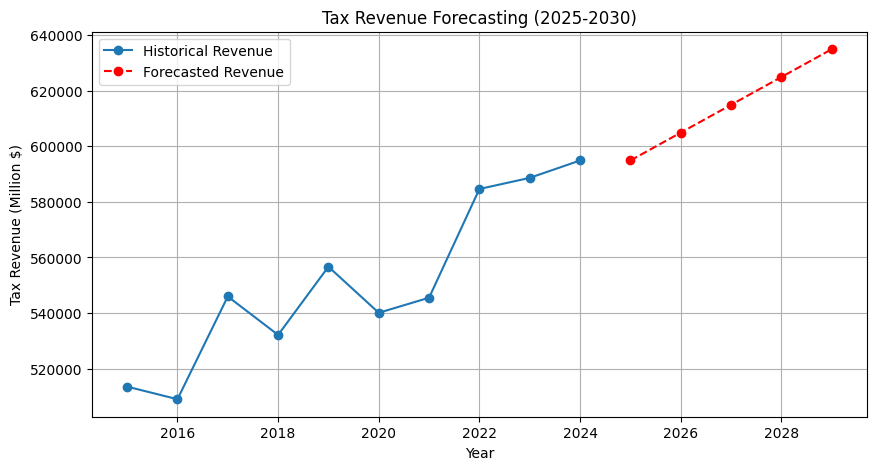

In [ ]:
# Forecasting Tax Revenue (Time-Series Simulation)
years = np.arange(2015, 2025)
revenue_trend = 500000 + 10000 * np.arange(len(years)) + np.random.normal(0, 20000, len(years))
future_years = np.arange(2025, 2030)
future_revenue = revenue_trend[-1] + (future_years - future_years[0]) * 10000

plt.figure(figsize=(10, 5))
plt.plot(years, revenue_trend, marker='o', linestyle='-', label="Historical Revenue")
plt.plot(future_years, future_revenue, marker='o', linestyle='--', label="Forecasted Revenue", color='red')
plt.xlabel("Year")
plt.ylabel("Tax Revenue (Million $)")
plt.title("Tax Revenue Forecasting (2025-2030)")
plt.legend()
plt.grid(True)
plt.show()

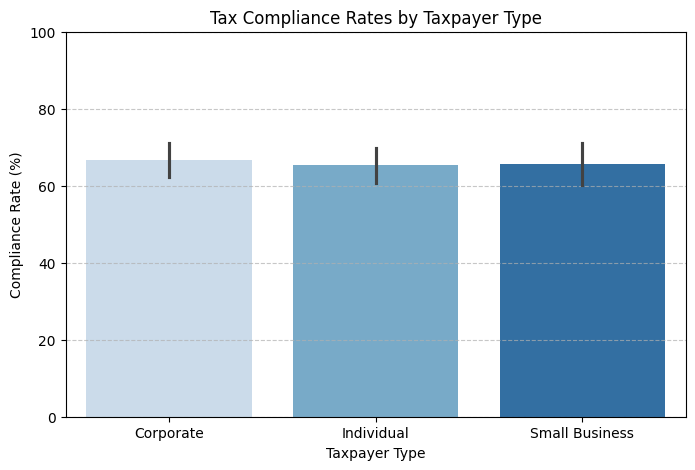

In [ ]:
# Compliance Rate Analysis
plt.figure(figsize=(8, 5))
sns.barplot(x=data["Taxpayer_Type"], y=data["Compliance_Rate"], palette="Blues")
plt.xlabel("Taxpayer Type")
plt.ylabel("Compliance Rate (%)")
plt.title("Tax Compliance Rates by Taxpayer Type")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

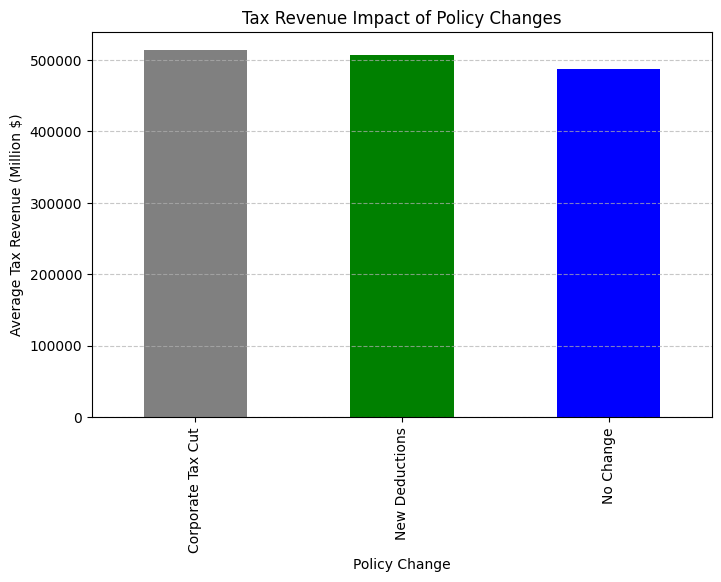

In [ ]:
# Policy Evaluation (Before vs After Tax Revenue Change)
policy_groups = data.groupby("Policy_Change")["Tax_Revenue"].mean()
plt.figure(figsize=(8, 5))
policy_groups.plot(kind='bar', color=['gray', 'green', 'blue'])
plt.xlabel("Policy Change")
plt.ylabel("Average Tax Revenue (Million $)")
plt.title("Tax Revenue Impact of Policy Changes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

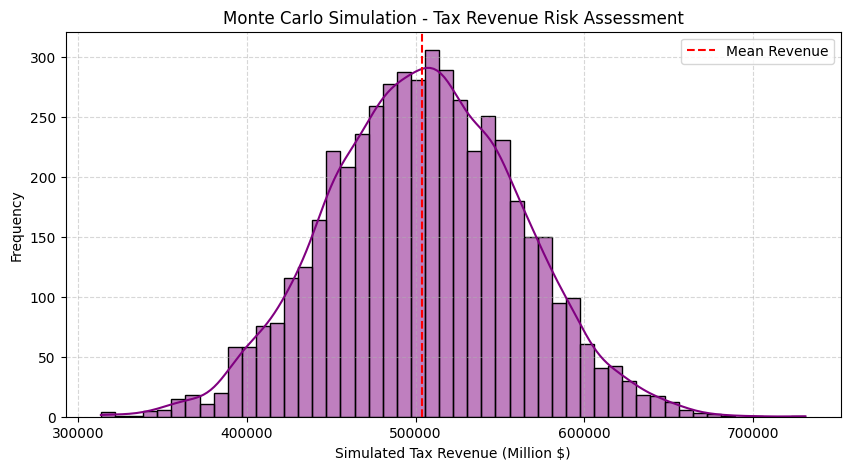

In [ ]:
# Monte Carlo Simulation - Risk Assessment
simulations = 5000
mean_revenue = data["Tax_Revenue"].mean()
std_dev = data["Tax_Revenue"].std()
simulated_revenues = np.random.normal(mean_revenue, std_dev, simulations)

plt.figure(figsize=(10, 5))
sns.histplot(simulated_revenues, bins=50, kde=True, color="purple")
plt.xlabel("Simulated Tax Revenue (Million $)")
plt.ylabel("Frequency")
plt.title("Monte Carlo Simulation - Tax Revenue Risk Assessment")
plt.axvline(mean_revenue, color='red', linestyle='dashed', label="Mean Revenue")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# Generate Synthetic Dataset
np.random.seed(42)
n_samples = 100

data = pd.DataFrame({
    "Taxable_Income": np.random.normal(50000, 15000, n_samples),  # Mean 50K, Std 15K
    "Deductions": np.random.normal(10000, 3000, n_samples),  # Mean 10K, Std 3K
    "Compliance_Rate": np.random.uniform(40, 90, n_samples),  # Between 40% and 90%
    "GDP_Growth": np.random.uniform(2, 8, n_samples),
    "Inflation_Rate": np.random.uniform(1, 10, n_samples),
    "Unemployment_Rate": np.random.uniform(3, 12, n_samples),
    "Interest_Rates": np.random.uniform(2, 12, n_samples),
    "Exchange_Rates": np.random.uniform(80, 120, n_samples),
    "Tax_Revenue": np.random.normal(500000, 50000, n_samples),
})

In [ ]:
# Linear Regression for Tax Revenue Forecasting
X = data[["Taxable_Income", "Deductions", "GDP_Growth", "Inflation_Rate", "Unemployment_Rate", "Interest_Rates"]]
y = data["Tax_Revenue"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Linear Regression MAE: 46444.00
Linear Regression R² Score: -0.12


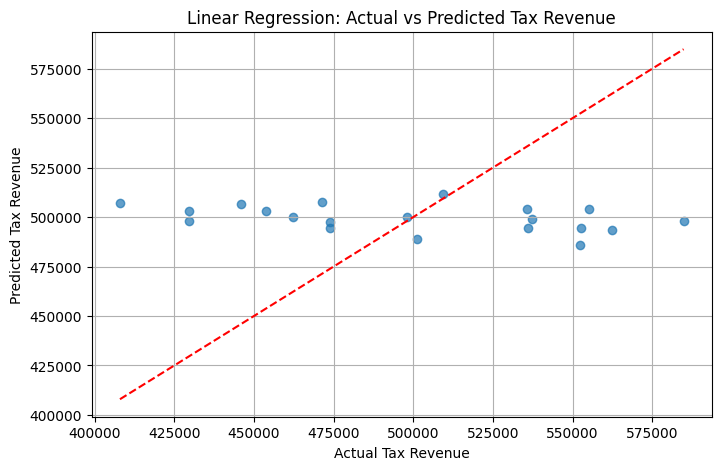

In [ ]:
# Evaluate Linear Regression Model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression MAE: {mae:.2f}")
print(f"Linear Regression R² Score: {r2:.2f}")

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Tax Revenue")
plt.ylabel("Predicted Tax Revenue")
plt.title("Linear Regression: Actual vs Predicted Tax Revenue")
plt.grid(True)
plt.show()

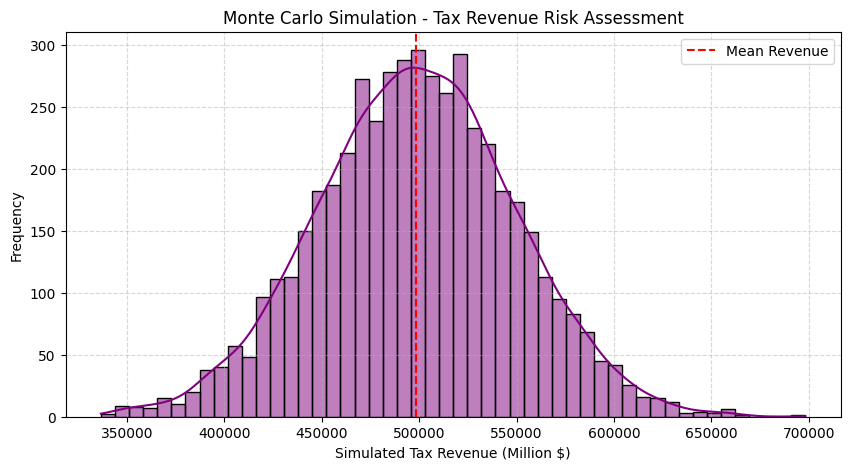

In [ ]:
# Monte Carlo Simulation - Risk Assessment
simulations = 5000
mean_revenue = data["Tax_Revenue"].mean()
std_dev = data["Tax_Revenue"].std()
simulated_revenues = np.random.normal(mean_revenue, std_dev, simulations)

plt.figure(figsize=(10, 5))
sns.histplot(simulated_revenues, bins=50, kde=True, color="purple")
plt.xlabel("Simulated Tax Revenue (Million $)")
plt.ylabel("Frequency")
plt.title("Monte Carlo Simulation - Tax Revenue Risk Assessment")
plt.axvline(mean_revenue, color='red', linestyle='dashed', label="Mean Revenue")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# Comparison
print("\nComparison:")
print(f"Linear Regression R² Score: {r2:.2f}")
print("Monte Carlo provides a risk distribution rather than a single accuracy metric.")


Comparison:
Linear Regression R² Score: -0.12
Monte Carlo provides a risk distribution rather than a single accuracy metric.


Linear Regression R²: 0.8863218353719998
XGBoost R²: 0.8435962109835011


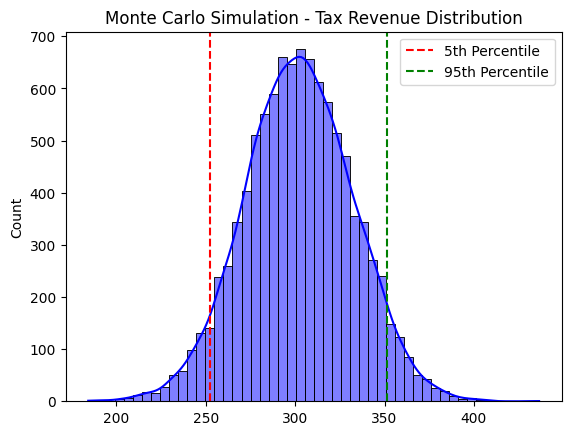

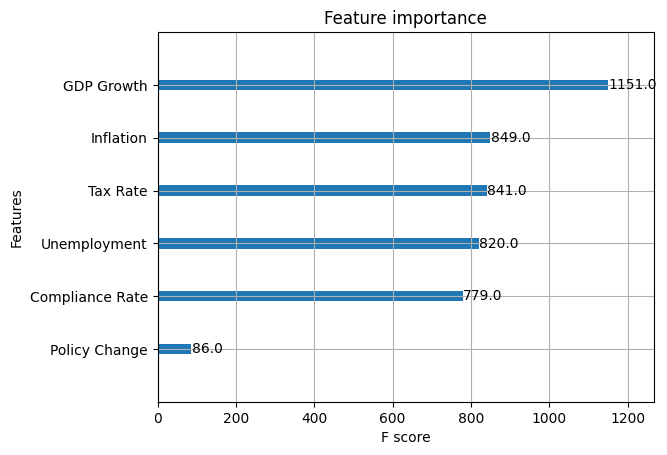

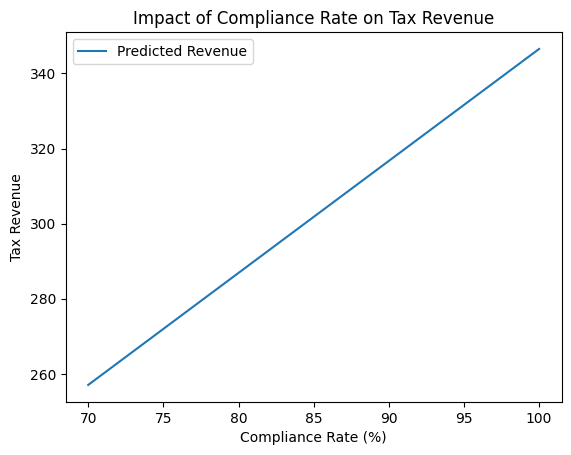

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import xgboost as xgb

# Simulated Dataset (Placeholder for Real Data)
n_samples = 1000
np.random.seed(42)

gdp_growth = np.random.normal(5, 1.5, n_samples)  # GDP Growth (%)
inflation = np.random.normal(3, 0.8, n_samples)  # Inflation (%)
unemployment = np.random.normal(6, 1.2, n_samples)  # Unemployment Rate (%)
compliance_rate = np.random.uniform(70, 100, n_samples)  # Compliance %
tax_rate = np.random.uniform(10, 30, n_samples)  # Tax Rate %
policy_change = np.random.choice([0, 1], size=n_samples, p=[0.8, 0.2])  # Policy Change (0=No, 1=Yes)

# Revenue (Target Variable) with some noise
tax_revenue = (gdp_growth * 2.5 + inflation * 1.2 - unemployment * 1.5 + compliance_rate * 3 + tax_rate * 2 + policy_change * 5 + np.random.normal(0, 10, n_samples))

data = pd.DataFrame({
    'GDP Growth': gdp_growth,
    'Inflation': inflation,
    'Unemployment': unemployment,
    'Compliance Rate': compliance_rate,
    'Tax Rate': tax_rate,
    'Policy Change': policy_change,
    'Tax Revenue': tax_revenue
})

# Split Data
X = data.drop(columns=['Tax Revenue'])
y = data['Tax Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# XGBoost Model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Model Evaluation
print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("XGBoost R²:", r2_score(y_test, y_pred_xgb))

# Monte Carlo Simulation
n_simulations = 10000
revenue_simulation = np.random.normal(y.mean(), y.std(), n_simulations)

# Monte Carlo Visualization
sns.histplot(revenue_simulation, bins=50, kde=True, color='blue')
plt.axvline(np.percentile(revenue_simulation, 5), color='red', linestyle='dashed', label='5th Percentile')
plt.axvline(np.percentile(revenue_simulation, 95), color='green', linestyle='dashed', label='95th Percentile')
plt.title('Monte Carlo Simulation - Tax Revenue Distribution')
plt.legend()
plt.show()

# Feature Importance (XGBoost)
xgb.plot_importance(xgb_model)
plt.show()

# Compliance Rate Impact
compliance_values = np.linspace(70, 100, 30)
predicted_revenue = lr.predict(pd.DataFrame({'GDP Growth': np.mean(gdp_growth),
                                              'Inflation': np.mean(inflation),
                                              'Unemployment': np.mean(unemployment),
                                              'Compliance Rate': compliance_values,
                                              'Tax Rate': np.mean(tax_rate),
                                              'Policy Change': 0}))
plt.plot(compliance_values, predicted_revenue, label='Predicted Revenue')
plt.xlabel('Compliance Rate (%)')
plt.ylabel('Tax Revenue')
plt.title('Impact of Compliance Rate on Tax Revenue')
plt.legend()
plt.show()


#Tax Revenue Forcastation - Example Code

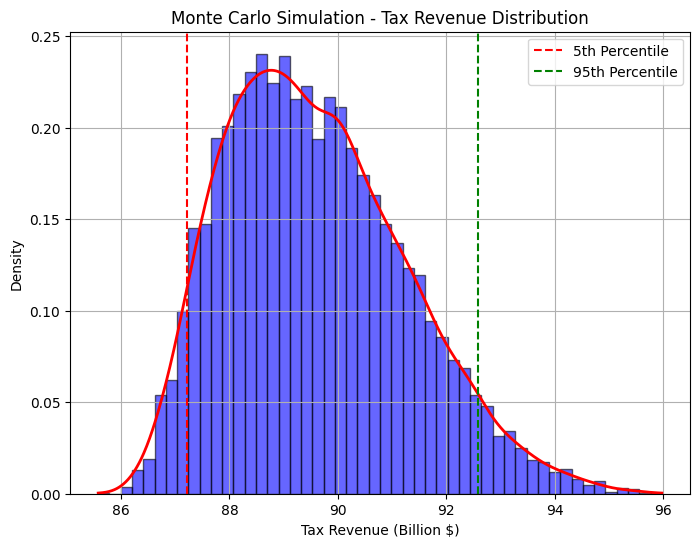

Expected Revenue (Mean): 89.60 Billion $
5th Percentile: 87.22 Billion $
95th Percentile: 92.59 Billion $


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Constants
num_simulations = 10000  # Number of Monte Carlo simulations
baseline_revenue = 100  # Baseline tax revenue in billion dollars

gdp_mean = 0.02  # Mean GDP growth (2%)
gdp_std = 0.005  # Standard deviation (0.5%)

compliance_low, compliance_high = 0.85, 0.95  # Tax compliance range (85%-95%)

# Generate random samples
np.random.seed(42)  # For reproducibility
gdp_growth_samples = np.random.normal(gdp_mean, gdp_std, num_simulations)
compliance_samples = np.random.beta(2, 5, num_simulations)  # Approximate beta distribution
compliance_samples = compliance_low + (compliance_high - compliance_low) * compliance_samples

# Compute tax revenue
revenue_samples = baseline_revenue * (1 + gdp_growth_samples) * compliance_samples

# Calculate percentiles
percentile_5 = np.percentile(revenue_samples, 5)
percentile_95 = np.percentile(revenue_samples, 95)

# Plot results
plt.figure(figsize=(8, 6))
plt.hist(revenue_samples, bins=50, density=True, alpha=0.6, color='b', edgecolor='black')

# Add KDE for smooth curve
x = np.linspace(min(revenue_samples), max(revenue_samples), 1000)
kde = stats.gaussian_kde(revenue_samples)
plt.plot(x, kde(x), 'r', linewidth=2)

# Vertical lines for 5th and 95th percentiles
plt.axvline(percentile_5, color='red', linestyle='dashed', label='5th Percentile')
plt.axvline(percentile_95, color='green', linestyle='dashed', label='95th Percentile')

# Labels
plt.title('Monte Carlo Simulation - Tax Revenue Distribution')
plt.xlabel('Tax Revenue (Billion $)')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

# Print key results
print(f"Expected Revenue (Mean): {np.mean(revenue_samples):.2f} Billion $")
print(f"5th Percentile: {percentile_5:.2f} Billion $")
print(f"95th Percentile: {percentile_95:.2f} Billion $")
